The Age of Misinformation: A Data Scientist's Role

Numbers have an inherit power to them. They bring a sense power and credibility to the arguement, whether it is genuine or not. Be in an advertisement, news article, or post on social media, the inclusion of statistics makes us more inclined to believe the information at face value. This perception stems from the beleif that "the facts" are objective and immune to manipulation.

The reality is that numbers are so easily manipulated. They can be selective to show exactly what a company wants, misrepresented in visuals to seem more or less extreme, or be flat out changed to shape the result. Context, methodology, and interpretation are purposefully hidden or ignored for the sake of convincing consumers. 

In this post I'll be exploring and demonstrating how simple it is to manipulate data into fitting my narrative. Hopefully this will make people approach data and statistics in media with a critical eye.

For this example I'll be working on a titanic dataset. This is a labeled dataset meaning we know the correct answers for our predictor variable "Surived". In addition, because the dataset is historical, we know the data to be unbiased. This specific dataset does not include all the people on the titanic, but it is a random sample of the full data. To start I'm importing my libraries, doing simple exploration, and cleaning where needed.

In [ ]:
# import our libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# check out our dataset
df = pd.read_csv("titanic.csv")
print(df.shape)
df.head(5)

(891, 5)


,Survived,Pclass,Gender,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [20]:
print(f"Missing values per column:\n{df.isna().sum()}")
print(f"Column dtypes:\n{df.dtypes}")

Missing values per column:
Survived    0
Pclass      0
Gender      0
Age         0
Fare        0
dtype: int64
Column dtypes:
Survived      int64
Pclass        int64
Gender       object
Age         float64
Fare        float64
dtype: object


Luckily there are no missing values we have to fix. In this next step all I'm doing is changing the columns to be useable in our models later on. 0 will represent Male passengers and 0 1 will represent female passengers.

In [21]:
# including this next line to avoid errors from future version
pd.set_option('future.no_silent_downcasting', True)

# changing column "Gender" to boolean values. 
df["Gender"] = df["Gender"].replace({"male": 0, "female": 1})
print(df["Gender"].value_counts())

Gender
0    577
1    314
Name: count, dtype: int64


For the last step in cleaning, we'll be checking the "Fare" column for any outliers because that could have a huge affect on our model.

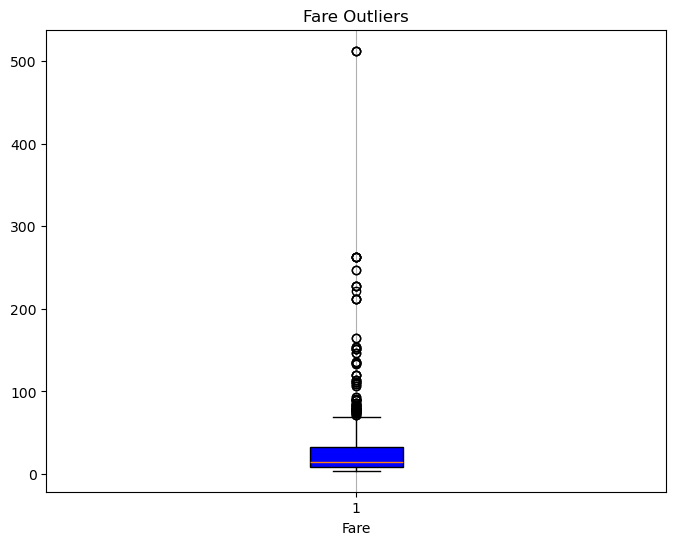

In [24]:
# we'll be using a box and whisker plot for outlier detection
plt.figure(figsize=(8, 6))
plt.boxplot(df["Fare"].dropna(), patch_artist=True, boxprops=dict(facecolor="blue"))
plt.title("Fare Outliers")
plt.xlabel("Fare")
plt.grid(axis='x')

plt.show()

Unfortunately, there are many outliers on the high end for fares. For this dataset, it would not be appropriate to remove or replace any of our outliers because we could be losnig valueable information about what influences the predictor variable "Survived". However, we still need to perform outlier detection to understand the impact it will have on our model later. Knowing we have so many high end outliers in our data could provide insight when we evaluate later on

Now that our dataset is ready, we're going to make a simple train/test split to use in our models. Our predictor variable will be "Survived", where 0 represents a passenger did not live and 1 represents a survivor. I'm using a decision tree that is limited to 3 splits for the sake of a simple visualization.

In [26]:
x = df.drop(columns=["Survived"]) # drop y variable, keep the rest
y = df["Survived"]

# train/test split. 80 train, 20 test.
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size= 0.2, random_state=1)
print(f"xtrain shape: {xtrain.shape}")
print(f"ytrain shape: {ytrain.shape}")
print(f"xtest shape: {xtest.shape}")
print(f"ytest shape: {ytest.shape}")

# creating and fitting our model
mdl1 = LogisticRegression(random_state=1)
mdl1.fit(xtrain, ytrain)

# create predictions
ypred = mdl1.predict(xtest)

xtrain shape: (712, 4)
ytrain shape: (712,)
xtest shape: (179, 4)
ytest shape: (179,)


Now that our model has ran we're going to look at it's performance. Please note that LogisticRegression is being used here for the sake of simplicity for our example. LogisticRegression assumes the variables are independent of each other, meaning one value has no affect on the others. For our dataset, the x variables are independent so we don't have to worry about that. It is also sensitive to outliers. We screened our float value, "Fare" for outliers earlier and found many. However, as discussed earlier, it is not appropriate to remove these so we will be evaluating with that in mind.

We'll be looking at the overall accuracy score and a confusion matrix to evaluate. The accuracy score is straightforward, its the number of correct predictions over the total points predicted. 

In [25]:
accuracy = accuracy_score(ytest, ypred)
print(f"Accuracy of Model 1: {accuracy:.5f}")

Accuracy of Model 1: 0.79888


Although far from perfect, a (rounded) accuracy score of 80% is a fairly good performance for our LogisticRegression model. In other words, our model correctly predicted 143 points of our 179 included in ytest. I'll discuss this more later, but note that even our labeled, unedited data fails to predict points perfectly.

Next we'll be looking at a confusion matrix. This provides a simple visual to see how our model is predicting points. This will provide insight into what types of points the model is best at predicting and where it struggles.

In [ ]:
conf_matrix = confusion_matrix(ytest, ypred)
print(conf_matrix)

issues:
- despite using 'pure' data, where we know the answers, the predictor model is not 100% accurate because errors are going to happen no matter what
- this alone is enough to be skeptical of peoples numbers
- but it can get so much worse too

introduce falsifying data
- now say the titanic happened today, and we work for a news outlet that wants to push the idea that the famous line 'women and children' was true, regardless of class/ticket
- the real data did not look good for this claim, or we want it to look even better
- so i'll edit the data to show all women survived the crash

In [ ]:
# edit the column survived on a new df

now we'll run the same decision tree, same parameters, on our edited dataset


In [ ]:
# run model
# print same metrics

- changes the results completely
- pushes our narrative
- took 2 seconds to change the entire story

- for this demonstration we know its not true, and its historical data so changing results doesn't really have an impact
- but say we instead worked for an insurance company, and we were told to decrease the amount paid out on claims. or we worked in sales and our boss asked us to make the sales figures look better.
- then it actually impacts people. claims who really need it are rejected and the boss looks good on paper while the business is actually failing
- it becomes the ethical responsibility of data scientists to uphold truthful data and results

- need to ensure the data source is good
    - reference the LA police deployment issue

In [ ]:
# breifly show code here if you can find the dataset/link to an article about it to break up the text

- it is unethical to change the data for your own gain
- causes issues in real life, rapid spread of misinformation
- not only an issue with numbers, but journalism have had this issue forever. numbers just make it more believeable

- also the NEW responsibility of people today, especially online, to be wary of the numbers/data because its not always true
- need to watch for the source of the data, the scale in how its displayed, what its being compared to, etc
- all too easy to make stuff up, to safely navigate the internet people need to understand this
- data scientist job to not make it any harder on people